In [75]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Ensure you have nltk and its vader_lexicon installed
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [111]:
# Provided data from airbnb community
text = """
1. Noise Complaints and Customer Service Discrepancies: Hosts express
frustration as guests complain about neighborhood noise despite clear
disclosures in listings. The challenge lies in customer service not acknowledging
the provided evidence.

2. Parking Rule Violations: Hosts are facing issues with guests disregarding
parking rules, even after clear communication in rule books and welcome letters.

3. Unauthorized Large Gatherings: A host shares a disturbing experience where a
guest, claiming to be renting for a brother's visit, hosted a disruptive gambling
party with over 20 people, resulting in damage and theft.

4. No-Show Guests and Lack of Communication: A new host faces a "no-show"
situation with no communication from the guest. They question how to handle
such instances with a moderate refund policy.

5. Undisclosed Pets Causing Damage: Hosts deal with guests bringing pets despite
clear restrictions, leading to significant furniture damage and replacement costs.

6. Unjust Refund Decisions: A host complains about a guest who gave negative
feedback and received a full refund, leaving the host infuriated by the customer
service decision.

7. High-Maintenance Guests: Hosts seek advice on handling guests who constantly
complain about various aspects, from mattress comfort to water temperature,
and even request discounts.

8. Communication Challenges: A host wonders if they should mark a guest down
for communication when there's no response, even with a contactless
check-in/out system.

9. Noise Complaints from Neighbors: Hosts face challenges with guests breaking
house rules, hosting loud parties, and disturbing neighbors, seeking advice on
how to handle the situation.

10.Guest Communication Timing: A new host seeks advice on when to reach out to
guests who haven't shown up or communicated after sending a welcome email
close to check-in time.

11.Increase in Refund Claims: Hosts express concern about a surge in guests filing
refund claims for minor issues, and they feel unsupported by customer service in
these situations.

12.Negative Reviews for Lack of Communication: Hosts discuss whether leaving a
negative review for guests who don't communicate is appropriate.

13.Decline in Guest Quality: Some hosts notice a decline in guest behavior, with an
increase in rule violations like sneaking in pets and extra unregistered guests.

14.No-Show Guests and Review Dilemma: A host seeks advice on handling a
Christmas booking where the guest never showed up, and they're unsure about
leaving a review in this unusual circumstance.

15.Dealing with Demands for Refunds: A host faces demands for a 50% refund from
guests complaining about various issues, seeking guidance on how to address
the situation fairly.
"""

In [112]:
# Separate the text into individual issues
issues = text.split("\n\n")

# Initialize the Sentiment Intensity Analyzer
sid = SentimentIntensityAnalyzer()

# Analyze the sentiment of each issue
for i, issue in enumerate(issues, 1):
    sentiment_score = sid.polarity_scores(issue)['compound']
    print(f"Issue {i}: Negative Sentiment Score: {sentiment_score:.4f}")

Issue 1: Negative Sentiment Score: -0.8997
Issue 2: Negative Sentiment Score: 0.0772
Issue 3: Negative Sentiment Score: -0.5994
Issue 4: Negative Sentiment Score: -0.5423
Issue 5: Negative Sentiment Score: -0.7772
Issue 6: Negative Sentiment Score: -0.9274
Issue 7: Negative Sentiment Score: 0.0000
Issue 8: Negative Sentiment Score: -0.2263
Issue 9: Negative Sentiment Score: -0.4588
Issue 10: Negative Sentiment Score: 0.4767
Issue 11: Negative Sentiment Score: -0.4019
Issue 12: Negative Sentiment Score: -0.7184
Issue 13: Negative Sentiment Score: 0.1027
Issue 14: Negative Sentiment Score: -0.4019
Issue 15: Negative Sentiment Score: -0.2023


Issue 1: Negative Sentiment Score: -0.8997
Issue Text: 
1. Noise Complaints and Customer Service Discrepancies: Hosts express
frustration as guests complain about neighborhood noise despite clear
disclosures in listings. The challenge lies in customer service not acknowledging
the provided evidence.

Issue 3: Negative Sentiment Score: -0.5994
Issue Text: 3. Unauthorized Large Gatherings: A host shares a disturbing experience where a
guest, claiming to be renting for a brother's visit, hosted a disruptive gambling
party with over 20 people, resulting in damage and theft.

Issue 4: Negative Sentiment Score: -0.5423
Issue Text: 4. No-Show Guests and Lack of Communication: A new host faces a "no-show"
situation with no communication from the guest. They question how to handle
such instances with a moderate refund policy.

Issue 5: Negative Sentiment Score: -0.7772
Issue Text: 5. Undisclosed Pets Causing Damage: Hosts deal with guests bringing pets despite
clear restrictions, leading to sig

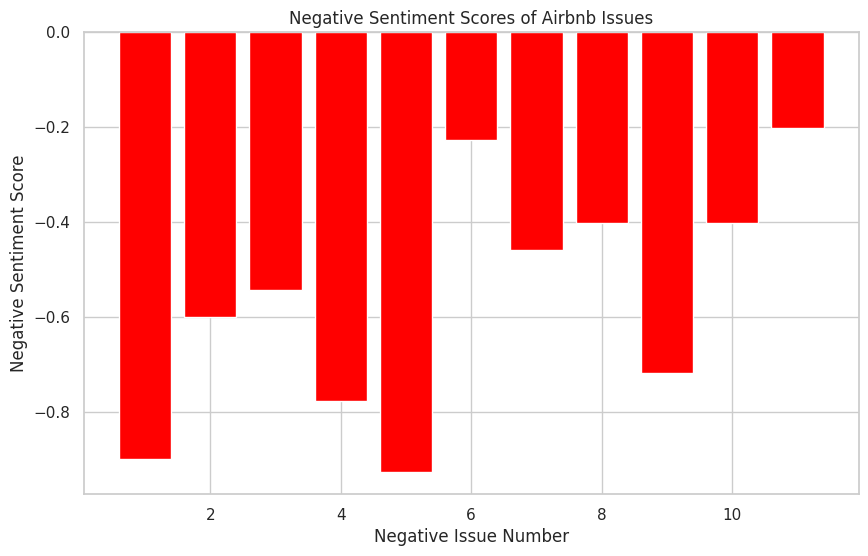

In [97]:
import matplotlib.pyplot as plt
# Separate the text into individual issues
issues = text.split("\n\n")

# Initialize the Sentiment Intensity Analyzer
sid = SentimentIntensityAnalyzer()

# Analyze the sentiment of each issue
negative_issues = []
for i, issue in enumerate(issues, 1):
    sentiment_score = sid.polarity_scores(issue)['compound']
    # Include only issues with negative sentiment scores
    if sentiment_score < 0:
        negative_issues.append((i, issue, sentiment_score))

# Display the negative issues and their sentiment scores
for i, issue, sentiment_score in negative_issues:
    print(f"Issue {i}: Negative Sentiment Score: {sentiment_score:.4f}")
    print(f"Issue Text: {issue}\n")

# Visualize the negative issues with a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(negative_issues) + 1), [score for _, _, score in negative_issues], color='red')
plt.xlabel('Negative Issue Number')
plt.ylabel('Negative Sentiment Score')
plt.title('Negative Sentiment Scores of Airbnb Issues')
plt.show()

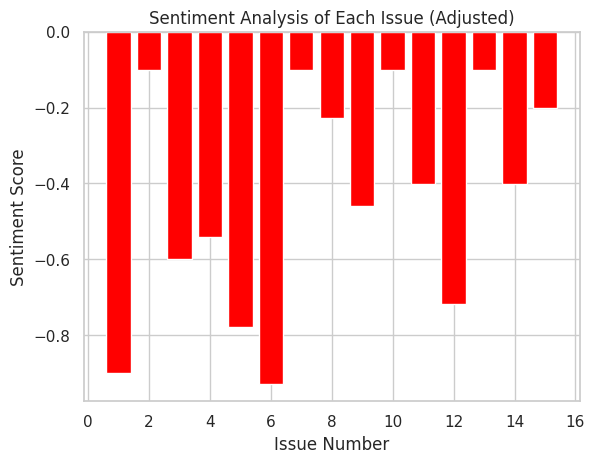

In [115]:
import matplotlib.pyplot as plt

# Sentiment scores for each issue
sentiment_scores = []

# Update the sentiment analysis loop to handle both negative and positive scores
for i, issue in enumerate(issues, 1):
    sentiment_score = sid.polarity_scores(issue)['compound']
    sentiment_scores.append(sentiment_score if sentiment_score < 0 else -0.1)

# Visualize the sentiment scores with adjusted values
plt.bar(range(1, len(sentiment_scores) + 1), sentiment_scores, color=['red' if score < 0 else 'green' for score in sentiment_scores])
plt.xlabel('Issue Number')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis of Each Issue (Adjusted)')
plt.show()

In [116]:
import re
import nltk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [137]:
# Clean and preprocess text data
def preprocess_text(text):
    # Remove digits and punctuation
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    return text

# Apply preprocessing
cleaned_data = preprocess_text(text)

# Tokenize and lemmatize text
lemmatizer = WordNetLemmatizer()
tokenized_data = nltk.word_tokenize(cleaned_data)
lemmatized_data = [lemmatizer.lemmatize(word) for word in tokenized_data]

# Convert data into a DataFrame
df = pd.DataFrame(lemmatized_data, columns=['text'])

# Vectorize text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])

# Perform clustering using K-means
num_clusters = 3  # You can adjust this parameter based on your data and requirements
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Add cluster labels to DataFrame
df['cluster'] = kmeans.labels_

# Function to extract keywords from each cluster
def extract_keywords(cluster_label, num_keywords=5):
    cluster_data = df[df['cluster'] == cluster_label]['text']
    tfidf_vectorizer_cluster = TfidfVectorizer(stop_words='english')
    tfidf_matrix_cluster = tfidf_vectorizer_cluster.fit_transform(cluster_data)
    feature_names = tfidf_vectorizer_cluster.get_feature_names_out()
    sorted_indices = (-tfidf_matrix_cluster.sum(axis=0)).argsort(axis=1)
    keywords = [feature_names[idx] for idx in sorted_indices[:, :num_keywords].flatten()]
    return keywords

# Extract keywords for each cluster
for i in range(num_clusters):
    keywords = extract_keywords(i)
    print(f"Cluster {i+1} Keywords: {keywords}")



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1 Keywords: [array([['guest']], dtype=object)]
Cluster 2 Keywords: [array([['host', 'communication', 'rule', 'advice', 'situation']],
      dtype=object)]
Cluster 3 Keywords: [array([['refund']], dtype=object)]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


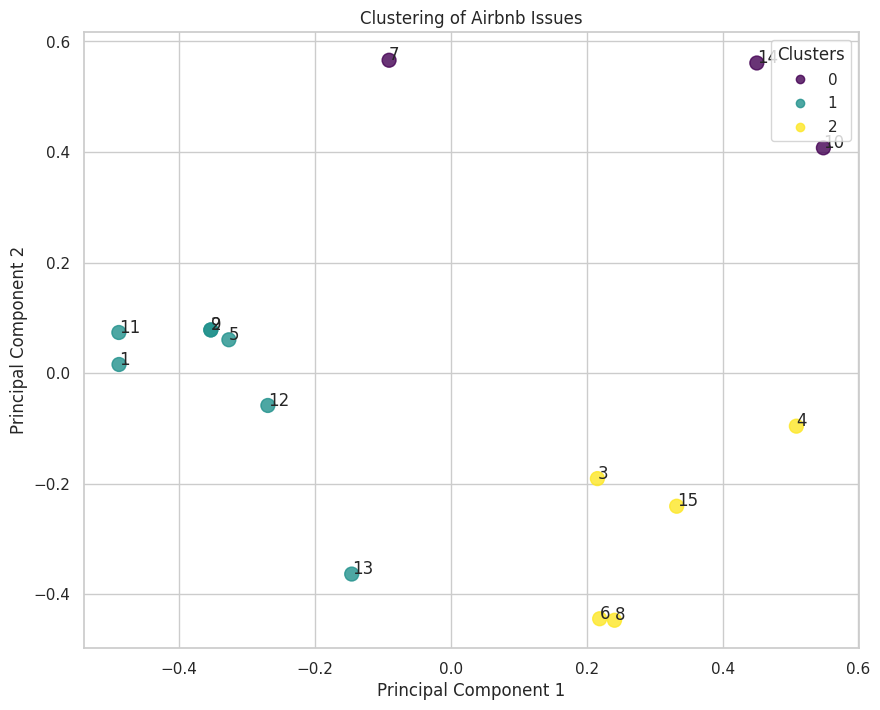


Cluster 1 Keywords:
[array([['advice', 'seeks', 'host', 'handling', 'reach', 'new', 'seek',
        'hosts', 'guests', 'constantly']], dtype=object)]

Cluster 2 Keywords:
[array([['hosts', 'express', 'guests', 'leaving', 'discuss',
        'disregarding', 'breaking', 'issues', 'challenges', 'facing',
        'face', 'decline', 'behavior', 'guest', 'notice', 'filing',
        'concern', 'surge', 'pets', 'despite', 'deal', 'bringing']],
      dtype=object)]

Cluster 3 Keywords:
[array([['host', 'faces', 'guest', 'new', 'wonders', 'mark', 'shares',
        'experience', 'disturbing', 'refund', 'negative', 'gave',
        'demands', 'complains', '50']], dtype=object)]


In [139]:
# Importing necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Preprocessing the text data
issues = text.split("\n")[1:-1]
documents = [issue.split(":")[1].strip() for issue in issues if ":" in issue]
issue_numbers = [i for i in range(1, len(documents) + 1)]

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# Applying KMeans clustering
k = 3  # You can adjust the number of clusters based on the optimal value
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Dimensionality reduction for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plotting the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=100, alpha=0.8)
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title("Clustering of Airbnb Issues")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Displaying issue numbers on each point
for i, txt in enumerate(issue_numbers):
    plt.annotate(txt, (X_pca[i, 0], X_pca[i, 1]))

plt.show()

# Extracting keywords for each cluster
clusters = {}
for i in range(k):
    cluster_issues = [documents[j] for j in range(len(documents)) if kmeans.labels_[j] == i]
    clusters[f'Cluster {i + 1}'] = cluster_issues

# Displaying the keywords for each cluster
for cluster, issues in clusters.items():
    print(f"\n{cluster} Keywords:")
    vectorizer = TfidfVectorizer(stop_words='english')
    X_cluster = vectorizer.fit_transform(issues)
    feature_names = vectorizer.get_feature_names_out()
    top_keywords_idx = X_cluster.sum(axis=0).argsort()[0, ::-1][:5]
    top_keywords = [feature_names[idx] for idx in top_keywords_idx]
    print(top_keywords)


In [140]:
# Displaying the keywords and original issues for each cluster
num_top_keywords = 7  # Set the desired number of top keywords

for cluster, issues in clusters.items():
    print(f"\n{cluster} Characteristics:")

    # Displaying top keywords
    print(f"\nTop Keywords:")
    vectorizer = TfidfVectorizer(stop_words='english', max_features=num_top_keywords)
    X_cluster = vectorizer.fit_transform(issues)
    feature_names = vectorizer.get_feature_names_out()

    # Exclude specific keywords
    top_keywords = [keyword for keyword in feature_names if keyword.lower() not in ['host', 'guest', 'hosts','guests']]
    print(top_keywords)

    # Displaying original issues
    print(f"\nOriginal Issues:")
    for issue in issues:
        print(f"- {issue}")

    print("\n" + "="*50 + "\n")



Cluster 1 Characteristics:

Top Keywords:
['advice', 'constantly', 'handling', 'seeks']

Original Issues:
- Hosts seek advice on handling guests who constantly
- A new host seeks advice on when to reach out to
- A host seeks advice on handling a



Cluster 2 Characteristics:

Top Keywords:
['express', 'issues', 'leaving', 'notice']

Original Issues:
- Hosts express
- Hosts are facing issues with guests disregarding
- Hosts deal with guests bringing pets despite
- Hosts face challenges with guests breaking
- Hosts express concern about a surge in guests filing
- Hosts discuss whether leaving a
- Some hosts notice a decline in guest behavior, with an



Cluster 3 Characteristics:

Top Keywords:
['50', 'complains', 'demands', 'disturbing', 'faces']

Original Issues:
- A host shares a disturbing experience where a
- A new host faces a "no-show"
- A host complains about a guest who gave negative
- A host wonders if they should mark a guest down
- A host faces demands for a 50% refund from
